In [22]:
from selenium import webdriver
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)
import time

#### Building the dataset

In [3]:
browser = webdriver.Chrome()
browser.get('https://www.eecs.mit.edu/people/faculty-advisors')

names = "div span[class='field-content card-title'] a"

getname = browser.find_elements_by_css_selector(names)

profe_lista = []
for item in getname:
    profe_lista.append(item.text)

In [4]:
#create a DF
name_df = pd.DataFrame(profe_lista[:30],columns=['Name'])

name_df[['finame','laname']] = name_df['Name'].loc[name_df['Name'].str.split().str.len() == 2].str.split(expand=True)

#URL of the professor
name_df['URL'] = "https://arxiv.org/search/?query=" + name_df['finame'] + "+" + name_df['laname'] + "&searchtype=all&abstracts=show&order=-announced_date_first&size=50"

name_df.dropna(inplace=True)
name_df.reset_index(inplace=True)

convert_dict = {'Name':str,'finame':str,'laname':str}
name_df = name_df.astype(convert_dict)

In [7]:
#extracting abstracts
options = webdriver.ChromeOptions()
options.add_argument("--incognito")
browser = webdriver.Chrome(options = options)
list_content = []
list_title = []
for i in name_df['URL']:
    browser.get(i)
    click = "//span/a[text()='▽ More']"
    getclick = browser.find_elements_by_xpath(click)
    for item in getclick:
        item.click()
    getcontent = browser.find_elements_by_css_selector("span[class='abstract-full has-text-grey-dark mathjax']")
    for content in getcontent:
        list_content.append(content.text)
    gettitle = browser.find_elements_by_css_selector("p[class='title is-5 mathjax']")
    for title in gettitle:
        list_title.append(title.text)
    time.sleep(2)   

In [179]:
browser = webdriver.Chrome()
for i in name_df['URL']:
    browser.get(i)
    content = "span[class='abstract-full has-text-grey-dark mathjax']"
    click = "//span/a[text()='▽ More']"
    getclick = browser.find_elements_by_xpath(click)
    for item in getclick:
        item.click()
    getcontent = browser.find_elements_by_css_selector(content)
    gettitle = browser.find_elements_by_css_selector("p[class='title is-5 mathjax']")

In [5]:
name_df

,index,Name,finame,laname,URL
0,0,Hal Abelson,Hal,Abelson,https://arxiv.org/search/?query=Hal+Abelson&se...
1,1,Elfar Adalsteinsson,Elfar,Adalsteinsson,https://arxiv.org/search/?query=Elfar+Adalstei...
2,2,Fadel Adib,Fadel,Adib,https://arxiv.org/search/?query=Fadel+Adib&sea...
3,3,Anant Agarwal,Anant,Agarwal,https://arxiv.org/search/?query=Anant+Agarwal&...
4,4,Pulkit Agrawal,Pulkit,Agrawal,https://arxiv.org/search/?query=Pulkit+Agrawal...
5,5,Akintunde Akinwande,Akintunde,Akinwande,https://arxiv.org/search/?query=Akintunde+Akin...
6,6,Mohammad Alizadeh,Mohammad,Alizadeh,https://arxiv.org/search/?query=Mohammad+Aliza...
7,7,Saman Amarasinghe,Saman,Amarasinghe,https://arxiv.org/search/?query=Saman+Amarasin...
8,8,Jacob Andreas,Jacob,Andreas,https://arxiv.org/search/?query=Jacob+Andreas&...
9,9,Dimitri Antoniadis,Dimitri,Antoniadis,https://arxiv.org/search/?query=Dimitri+Antoni...


In [8]:
abstract_df = pd.DataFrame(zip(list_title,list_content),
             columns=['title','content'])

In [263]:
abstract_df.head(5)

,title,content
0,Joint multi-contrast Variational Network recon...,Purpose: To improve the image quality of highl...
1,Nonlinear Dipole Inversion (NDI) enables Quant...,We propose Nonlinear Dipole Inversion (NDI) fo...
2,Fetal Pose Estimation in Volumetric MRI using ...,The performance and diagnostic utility of magn...
3,Temporal Registration in Application to In-ute...,We present a robust method to correct for moti...
4,Temporal Registration in In-Utero Volumetric M...,We present a robust method to correct for moti...


#### Exploring and Preprocessing

In [379]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.wordnet import NOUN,VERB,ADJ
stop_en = stopwords.words("english")
import collections
import itertools
import string
from wordcloud import WordCloud
import regex
import matplotlib.pyplot as plt
import numpy as np

In [79]:
all_string = "".join(list(abstract_df.title + abstract_df.content))

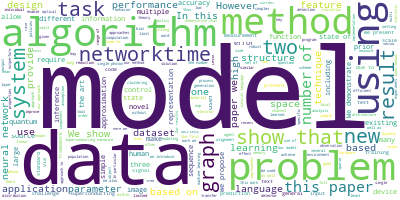

In [101]:
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(all_string)
# Visualize the word cloud
wordcloud.to_image()

In [394]:
tokens = nltk.tokenize.word_tokenize(all_string)

ctd = collections.Counter(tokens)
ctd.most_common()

[('the', 3599),
 (',', 3240),
 ('.', 3007),
 ('of', 2754),
 ('and', 2127),
 ('a', 1916),
 ('to', 1772),
 ('in', 1111),
 ('for', 1075),
 ('that', 909),
 ('is', 812),
 (')', 794),
 ('(', 772),
 ('with', 693),
 ('on', 638),
 ('we', 569),
 ('We', 554),
 ('as', 463),
 ('by', 456),
 ('are', 432),
 ('△', 431),
 ('from', 404),
 ('this', 402),
 ('an', 374),
 ('can', 362),
 ('be', 311),
 ('model', 302),
 ('The', 292),
 ('data', 265),
 ('which', 260),
 (':', 250),
 ('our', 248),
 ('at', 231),
 ('models', 215),
 ('or', 206),
 ('In', 195),
 ('these', 186),
 ('show', 183),
 ('have', 181),
 ('it', 175),
 ('using', 167),
 ('Our', 158),
 ('results', 155),
 ('learning', 154),
 ('algorithms', 154),
 ('such', 153),
 ('paper', 151),
 ('has', 147),
 ('new', 141),
 ('This', 139),
 ('not', 131),
 ('approach', 130),
 ('performance', 130),
 ('methods', 127),
 ('also', 124),
 ('problem', 121),
 ('algorithm', 119),
 ('over', 119),
 ('method', 119),
 ('based', 119),
 ('use', 117),
 ('time', 116),
 ('than', 113),
 

In [490]:
#Building a clean list_of_listsoftokens
temp_all_string = list(abstract_df.title + abstract_df.content)
list_of_listsoftokens = []
for x in temp_all_string:
    list_of_listsoftokens.append(nltk.tokenize.word_tokenize(x.lower()))

#cleaning data
corpus_1 = []
for lists in list_of_listsoftokens:
    corpus_1.append([token for token in lists if not token in stop_en])
    
corpus_2 = []
for lists in corpus_1:
    corpus_2.append([regex.sub(r"[A-Za-z=-]+[\d]+[\w]*|[\d]+[-=A-Za-z]+[\w]*|\d+(?:\.\d+)?|\d"," ",token) 
                     for token in lists])

corpus_3 = []
for lists in corpus_2:
    corpus_3.append([token for token in lists if not token in string.punctuation])
    
corpus_4 = []
own_filter = [" ","△","mm","\\",'``','-','--']
for lists in corpus_3:
    corpus_4.append([token for token in lists if not token in own_filter])

#Create the set of lists for LDA
list_of_listsoftokens_clean = [" ".join(word) for word in corpus_4]

In [450]:
#Building the corpus
pre_corpus = []
for words in list_of_listsoftokens_clean:
    pre_corpus.append(nltk.tokenize.word_tokenize(words))
    corpus = (list(itertools.chain.from_iterable(pre_corpus)))

#POS Tagging for the lemmatization
lemmatizer = WordNetLemmatizer()

lem_corpus = []
tags = nltk.pos_tag(corpus)
for i , token in enumerate(corpus):
    pos_tag = tags[i][1]
    
    if pos_tag.startswith("N"):
        lemma = lemmatizer.lemmatize(token, pos=NOUN)
    elif pos_tag.startswith("V"):
        lemma = lemmatizer.lemmatize(token, pos=VERB)
    elif pos_tag.startswith("J"):
        lemma = lemmatizer.lemmatize(token, pos=ADJ)
    else:
        lemma = token
    lem_corpus.append(lemma)

In [418]:
#Manual removing words that affect the results
while "use" in lem_corpus:
    lem_corpus.remove("use")
    
while '``' in lem_corpus:
    lem_corpus.remove('``')

In [419]:
ctd_2 = collections.Counter(lem_corpus)
top_20 = ctd_2.most_common()[:20]

top_20

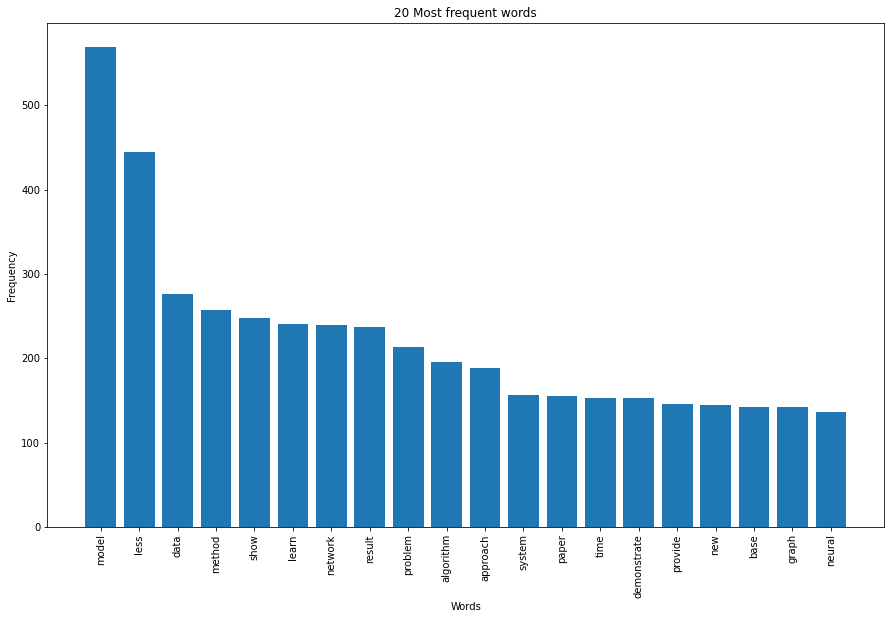

In [421]:
token = [(word[0]) for word in top_20]
freq = [(freq[1]) for freq in top_20]

plt.figure(2, figsize=(15, 15/1.6180))
plt.bar(*zip(*top_20_list))
plt.title("20 Most frequent words")
plt.xticks(np.arange(len(top_20)), token, rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.show()

#### Applying Latent Dirichlet Allocation

In [282]:
from gensim import corpora, models

In [492]:
lda_list_oflists = []
for word in list_of_listsoftokens_clean:
    lda_list_oflists.append(nltk.word_tokenize(word))

dictionary_LDA = corpora.Dictionary(lda_list_oflists)
dictionary_LDA.filter_extremes(no_below=3)

In [493]:
corp = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in lda_list_oflists]

In [494]:
num_topics = 5
lda_model = models.LdaModel(corp,num_topics=num_topics,id2word=dictionary_LDA,passes=4,alpha=[0.01]*num_topics
                            ,eta=[0.01]*len(dictionary_LDA.keys()))

In [495]:
#Topics found
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics,num_words=20):
    print(str(i)+": "+topic)
    print()

0: 0.005*"−" + 0.005*"channel" + 0.005*"web" + 0.005*"using" + 0.005*"'s" + 0.005*"based" + 0.004*"data" + 0.004*"results" + 0.004*"model" + 0.004*"quantum" + 0.004*"paper" + 0.004*"error" + 0.004*"networks" + 0.004*"performance" + 0.004*"``" + 0.004*"also" + 0.004*"process" + 0.004*"control" + 0.004*"present" + 0.004*"network"

1: 0.012*"data" + 0.010*"superconducting" + 0.008*"model" + 0.007*"nanowire" + 0.006*"results" + 0.005*"learning" + 0.005*"using" + 0.005*"models" + 0.005*"performance" + 0.004*"photon" + 0.004*"training" + 0.004*"used" + 0.004*"detector" + 0.004*"tensor" + 0.004*"show" + 0.004*"current" + 0.004*"single" + 0.004*"method" + 0.004*"sparse" + 0.004*"use"

2: 0.008*"data" + 0.008*"models" + 0.007*"bayesian" + 0.007*"model" + 0.007*"posterior" + 0.007*"inference" + 0.006*"cost" + 0.006*"approximation" + 0.005*"methods" + 0.005*"function" + 0.005*"number" + 0.005*"variational" + 0.004*"using" + 0.004*"use" + 0.004*"show" + 0.004*"policy" + 0.004*"iteration" + 0.004*"

In [496]:
lda_model[corp[1]] # corp[0] means the first document.

[(0, 0.7716074), (4, 0.2280269)]

#### Visualization of results

In [497]:
import pyLDAvis
import pyLDAvis.gensim

In [498]:
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corp, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)